In [ ]:
import pandas as pd

## Anomaly explainer dashboard

After running the model on the provided dataset, there has been x anomalies found.
To get the plots and the relative dataset occurrence, just indicate the anomaly index and run the following cells

In [11]:
dataset_path = Path
dataset_path_raw = Path

In [ ]:
columns = ['Source Port', 'Destination Port', 'Magnitude', 'Event Name_0',
       'Event Name_1', 'Event Name_2', 'Event Name_3', 'Event Name_4',
       'Event Name_5', 'Event Name_6', 'Event Name_7', 'Event Name_8',
       'Event Name_9', 'Source_IP_0', 'Source_IP_1', 'Source_IP_2',
       'Source_IP_3', 'Destination_IP_0', 'Destination_IP_1',
       'Destination_IP_2', 'Destination_IP_3', 'ms_since_week_begin']

In [ ]:
columns_raw = ["source_port", "destination_port", "magnitude", "event_name", "source_ip", "destination_ip",
                         "ms_since_week_begin"]

In [ ]:
colums_extended = []
for i in range(32):
    for j in range(7):
        if i != 31:
            colums_extended.append(columns_raw[j] + " (t-" + str(31 - i) + ") " + " i=" + str(i))
        else:
            colums_extended.append(columns_raw[j] + " (t) " + " i=" + str(i))

In [13]:
#importing the dataset chunkwise to avoid memory saturation
chunks = []
for chunk in pd.read_csv(dataset_path, chunksize=55555, sep = "\t"):
    chunks.append(chunk)
#a Pandas DataFrame to store the imported Data
df = pd.concat(chunks)

In [15]:
#importing the dataset chunkwise to avoid memory saturation
chunks = []
for chunk in pd.read_csv(dataset_path_raw, chunksize=55555, sep = "\t"):
    chunks.append(chunk)
#a Pandas DataFrame to store the imported Data
df_raw = pd.concat(chunks)

## get entries for which we have a positive prediction

In [20]:
##read ffrom file

pos_examples = (maes_test > threshold).nonzero(as_tuple=True)[0].detach().numpy()

In [23]:
dataframes_raw = []
for example in pos_examples:
    dataframes.append(df.iloc[example-32:example])
    dataframes_raw.append(df_raw.iloc[example-32:example].reset_index())

In [39]:
example_to_explain = 1
data = torch.tensor(dataframes[example_to_explain].to_numpy().astype(np.float32)).unsqueeze(0)
explainer = shap.DeepExplainer(model.to("cpu"), background_data)
shap_values = explainer.shap_values(data).reshape(32, 22)
expected = explainer.expected_value

In [40]:
shap.force_plot(expected, np.sum(shap_values, axis=0), feature_names=df.columns)

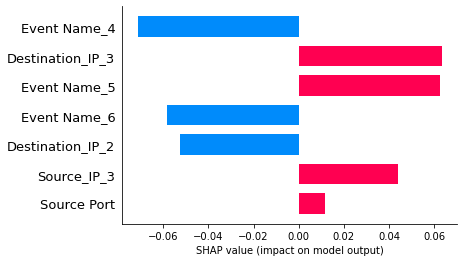

In [41]:
shap.bar_plot(np.sum(shap_values, axis=0), feature_names=df.columns)

In [42]:
df.columns

Index(['Source Port', 'Destination Port', 'Magnitude', 'Event Name_0',
       'Event Name_1', 'Event Name_2', 'Event Name_3', 'Event Name_4',
       'Event Name_5', 'Event Name_6', 'Event Name_7', 'Event Name_8',
       'Event Name_9', 'Source_IP_0', 'Source_IP_1', 'Source_IP_2',
       'Source_IP_3', 'Destination_IP_0', 'Destination_IP_1',
       'Destination_IP_2', 'Destination_IP_3', 'ms_since_week_begin'],
      dtype='object')

In [43]:
source_port = np.expand_dims(shap_values[:,0], 1)
destination_port = np.expand_dims(shap_values[:,1], 1)
magnitude = np.expand_dims(shap_values[:,2], 1)
event_name = shap_values[:,3:12]
source_ip = shap_values[:,13:16]
destination_ip = shap_values[:,17:20]
ms_since_week_begin = np.expand_dims(shap_values[:,21], 1)

In [44]:
event_name = np.expand_dims(np.sum(event_name, axis=1), 1)
source_ip = np.expand_dims(np.sum(source_ip, axis=1), 1)
destination_ip = np.expand_dims(np.sum(destination_ip, axis=1), 1)

In [45]:
new_shap = np.hstack((source_port, destination_port, magnitude, event_name, source_ip, destination_ip, ms_since_week_begin))

In [46]:
new_names = ["source_port", "destination_port", "magnitude", "event_name", "source_ip", "destination_ip", "ms_since_week_begin"]

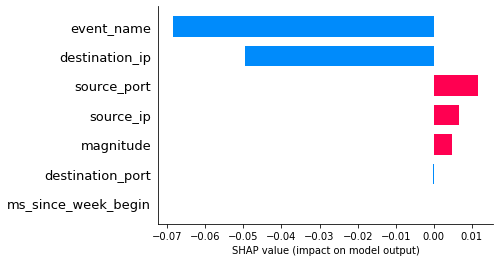

In [47]:
shap.bar_plot(np.sum(new_shap, axis=0), feature_names=new_names)

In [48]:
names_expand = []
colums_extended = []
for i in range(32):
    for j in range(7):
        if i!=31:
            colums_extended.append(new_names[j]+" (t-"+str(31-i)+ ") "+ " i="+str(i))
        else:
            colums_extended.append(new_names[j]+" (t) "+ " i="+str(i))

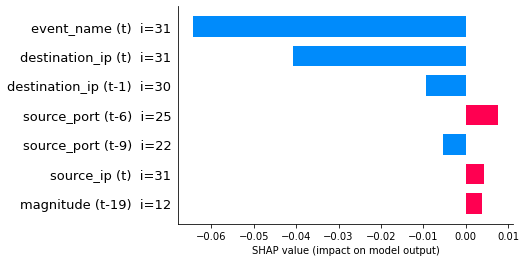

In [49]:
shap.bar_plot(new_shap.flatten(), feature_names=colums_extended)

In [50]:
dataframes_raw[example_to_explain]

,level_0,index,Event Name,Log Source,Start Time,Low Level Category,Source IP,Source Port,Destination IP,Destination Port,Magnitude
0,19220,13716500,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,56555,7
1,19221,13716501,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,30275,7
2,19222,13716502,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,44052,7
3,19223,13716503,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,28433,7
4,19224,13716504,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,21229,7
5,19225,13716505,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,39200,7
6,19226,13716506,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,44398,7
7,19227,13716507,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,31379,7
8,19228,13716508,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,11325,7
9,19229,13716509,Teardown TCP connection,ASA @ 10.192.159.130,1629891519844,Firewall Session Closed,10.198.33.90,8444,10.15.154.60,36039,7
